# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [ ]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 0 | Imports and Setup

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
paths = {
    "Manhattan": "/content/drive/MyDrive/rollingsales_manhattan.xlsx",
    "Bronx": "/content/drive/MyDrive/rollingsales_bronx.xlsx",
    "Staten Island": "/content/drive/MyDrive/rollingsales_statenisland.xlsx",
    "Queens": "/content/drive/MyDrive/rollingsales_queens.xlsx",
    "Brooklyn": "/content/drive/MyDrive/rollingsales_brooklyn.xlsx"
}

# Read and add borough column to each DataFrame
frames = []
for borough, path in paths.items():
    df_b = pd.read_excel(path, engine='openpyxl')
    df_b['borough'] = borough  # tag where each row came from
    frames.append(df_b)

# Combine into one dataset
df = pd.concat(frames, ignore_index=True)

print("Combined dataset rows:", len(df))
df.head()

Combined dataset rows: 79904


,Manhattan Rolling Sales. All Sales From November 2024 - October 2025,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,PTS Sales Data as of 11/12/2025,Unnamed: 20,borough,Bronx Rolling Sales. All Sales From November 2024 - October 2025,Staten Island Rolling Sales. All Sales From November 2024 - October 2025,Queens Rolling Sales. All Sales From November 2024 - October 2025,Brooklyn Rolling Sales. All Sales From November 2024 - October 2025
0,"For sales prior to the Final Roll, Neighborhoo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Manhattan,NaN,NaN,NaN,NaN
1,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Manhattan,NaN,NaN,NaN,NaN
2,Note: Condominium and cooperative sales are on...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Manhattan,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Manhattan,NaN,NaN,NaN,NaN
4,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376,43,NaN,S1,743 EAST 6 STREET,NaN,...,1940,1,S1,0,2025-01-23 00:00:00,Manhattan,NaN,NaN,NaN,NaN


## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [ ]:

# Load raw dataset
df = pd.read_excel('/content/drive/MyDrive/rollingsales_statenisland.xlsx',engine="openpyxl", header=4)
df.columns.tolist()

# Clean column names (remove spaces + lowercase)
df.columns.tolist()

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Remove rows where sale price is missing or zero
df['sale_price'] = pd.to_numeric(df['sale_price'], errors='coerce')
df = df[df['sale_price'] > 0]

# Fix sale date
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')

# Remove rows with no valid dates
df = df.dropna(subset=['sale_date'])

# Save cleaned version
df.to_csv('/content/drive/MyDrive/cleaned_statenisland.csv', index=False)

print("Cleaning complete. Rows remaining:", len(df))
df.head()


Cleaning complete. Rows remaining: 4552


,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,easement,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,11,NaN,A5,4720 AMBOY ROAD,NaN,...,1.0,0.0,1.0,2880.0,910.0,2002.0,1,A5,800000,2025-02-27
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,12,NaN,A5,4718 AMBOY ROAD,NaN,...,1.0,0.0,1.0,1746.0,910.0,2002.0,1,A5,655000,2025-06-17
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,40,NaN,A1,551 OAKDALE STREET,NaN,...,1.0,0.0,1.0,10000.0,3904.0,1980.0,1,A1,1350000,2025-03-12
5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5401,5,NaN,A2,28 JANSEN STREET,NaN,...,1.0,0.0,1.0,10800.0,2164.0,1980.0,1,A2,1150000,2025-10-01
6,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5403,4,NaN,A2,260 SHIRLEY AVENUE,NaN,...,1.0,0.0,1.0,7500.0,1600.0,1970.0,1,A2,995000,2024-11-26


In [ ]:
#DATA PREPARATION

# Standardize column name
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#  key columns
cols_keep = [
    'borough',
    'neighborhood',
    'building_class_category',
    'address',
    'sale_price',
    'sale_date',
    'land_square_feet',
    'gross_square_feet',
    'year_built'
]
# keep only the ones that actually exist in the dataframe
cols_keep = [c for c in cols_keep if c in df.columns]
data = df[cols_keep].copy()

#Clean sale price
data['sale_price'] = pd.to_numeric(data['sale_price'], errors='coerce')
data = data[data['sale_price'] > 0]   # drop $0 or invalid sales

#Clean sale date and create year
data['sale_date'] = pd.to_datetime(data['sale_date'], errors='coerce')
data = data.dropna(subset=['sale_date'])
data['year'] = data['sale_date'].dt.year

# Drop rows missing neighborhood
data['neighborhood'] = data['neighborhood'].astype(str).str.strip()
data = data[data['neighborhood'] != '']

print("Cleaning complete. Rows remaining:", len(data))
data.head()


Cleaning complete. Rows remaining: 4552


,borough,neighborhood,building_class_category,address,sale_price,sale_date,land_square_feet,gross_square_feet,year_built,year
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,4720 AMBOY ROAD,800000,2025-02-27,2880.0,910.0,2002.0,2025
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,4718 AMBOY ROAD,655000,2025-06-17,1746.0,910.0,2002.0,2025
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,551 OAKDALE STREET,1350000,2025-03-12,10000.0,3904.0,1980.0,2025
5,5,ANNADALE,01 ONE FAMILY DWELLINGS,28 JANSEN STREET,1150000,2025-10-01,10800.0,2164.0,1980.0,2025
6,5,ANNADALE,01 ONE FAMILY DWELLINGS,260 SHIRLEY AVENUE,995000,2024-11-26,7500.0,1600.0,1970.0,2024


In [ ]:


def clean_rolling_sales(path):

    # Read first 10 rows to detect header row
    preview = pd.read_excel(path, engine="openpyxl", nrows=10, header=None)

    header_row = None
    for i in range(len(preview)):
        row = preview.iloc[i].astype(str).str.lower().str.replace(" ", "_")
        if "sale_price" in list(row):
            header_row = i
            break

    if header_row is None:
        print(f"ERROR: Could not find header row in {path}")
        return pd.DataFrame()

    print(f"Detected header row {header_row} for {path}")

    #Read file using detected header row
    df = pd.read_excel(path, engine="openpyxl", header=header_row)

    #Standardize column names
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

    #Ensure required columns exist
    required_cols = ["sale_price", "sale_date", "neighborhood", "borough"]
    missing = [c for c in required_cols if c not in df.columns]

    if missing:
        print(f"WARNING: Missing columns in {path}: {missing}")

    # Keep only columns that exist
    cols_keep = [c for c in required_cols if c in df.columns]
    data = df[cols_keep].copy()

    # Clean sale price
    if "sale_price" in data.columns:
        data["sale_price"] = pd.to_numeric(data["sale_price"], errors="coerce")
        data = data[data["sale_price"] > 0]

    #Clean sale date
    if "sale_date" in data.columns:
        data["sale_date"] = pd.to_datetime(data["sale_date"], errors="coerce")
        data["year"] = data["sale_date"].dt.year

    # Clean neighborhood
    if "neighborhood" in data.columns:
        data["neighborhood"] = data["neighborhood"].astype(str).str.strip()

    return data


In [ ]:

files = {
    "Manhattan": "/content/drive/MyDrive/rollingsales_manhattan.xlsx",
    "Bronx": "/content/drive/MyDrive/rollingsales_bronx.xlsx",
    "Brooklyn": "/content/drive/MyDrive/rollingsales_brooklyn.xlsx",
    "Queens": "/content/drive/MyDrive/rollingsales_queens.xlsx",
    "Staten Island": "/content/drive/MyDrive/rollingsales_statenisland.xlsx"
}


In [ ]:
# Clean each file and combine
cleaned_list = []

for borough_name, path in files.items():
    print(f"Cleaning {borough_name}...")
    data_b = clean_rolling_sales(path)
    data_b['borough_name'] = borough_name
    cleaned_list.append(data_b)


data_all = pd.concat(cleaned_list, ignore_index=True)

print("Total rows after cleaning all boroughs:", len(data_all))
data_all.head()


Cleaning Manhattan...
Detected header row 4 for /content/drive/MyDrive/rollingsales_manhattan.xlsx
Cleaning Bronx...
Detected header row 4 for /content/drive/MyDrive/rollingsales_bronx.xlsx
Cleaning Brooklyn...
Detected header row 4 for /content/drive/MyDrive/rollingsales_brooklyn.xlsx
Cleaning Queens...
Detected header row 4 for /content/drive/MyDrive/rollingsales_queens.xlsx
Cleaning Staten Island...
Detected header row 4 for /content/drive/MyDrive/rollingsales_statenisland.xlsx
Total rows after cleaning all boroughs: 53228


,sale_price,sale_date,neighborhood,borough,year,borough_name
0,280000,2025-04-29,ALPHABET CITY,1,2025,Manhattan
1,2000000,2025-03-13,ALPHABET CITY,1,2025,Manhattan
2,3400000,2024-12-18,ALPHABET CITY,1,2024,Manhattan
3,4000000,2025-08-07,ALPHABET CITY,1,2025,Manhattan
4,13000000,2025-03-24,ALPHABET CITY,1,2025,Manhattan


In [ ]:
cleaned_list = []

for borough_name, path in files.items():
    print(f"\nCleaning {borough_name}...")
    data_b = clean_rolling_sales(path)
    data_b["borough_name"] = borough_name
    cleaned_list.append(data_b)

data_all = pd.concat(cleaned_list, ignore_index=True)
print("Total rows after cleaning all boroughs:", len(data_all))
data_all.head()



Cleaning Manhattan...
Detected header row 4 for /content/drive/MyDrive/rollingsales_manhattan.xlsx

Cleaning Bronx...
Detected header row 4 for /content/drive/MyDrive/rollingsales_bronx.xlsx

Cleaning Brooklyn...
Detected header row 4 for /content/drive/MyDrive/rollingsales_brooklyn.xlsx

Cleaning Queens...
Detected header row 4 for /content/drive/MyDrive/rollingsales_queens.xlsx

Cleaning Staten Island...
Detected header row 4 for /content/drive/MyDrive/rollingsales_statenisland.xlsx
Total rows after cleaning all boroughs: 53228


,sale_price,sale_date,neighborhood,borough,year,borough_name
0,280000,2025-04-29,ALPHABET CITY,1,2025,Manhattan
1,2000000,2025-03-13,ALPHABET CITY,1,2025,Manhattan
2,3400000,2024-12-18,ALPHABET CITY,1,2024,Manhattan
3,4000000,2025-08-07,ALPHABET CITY,1,2025,Manhattan
4,13000000,2025-03-24,ALPHABET CITY,1,2025,Manhattan


In [ ]:
# Save your dataset after you've worked on it
data_all.to_csv("cleaned_nyc_sales.csv", index=False)


## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

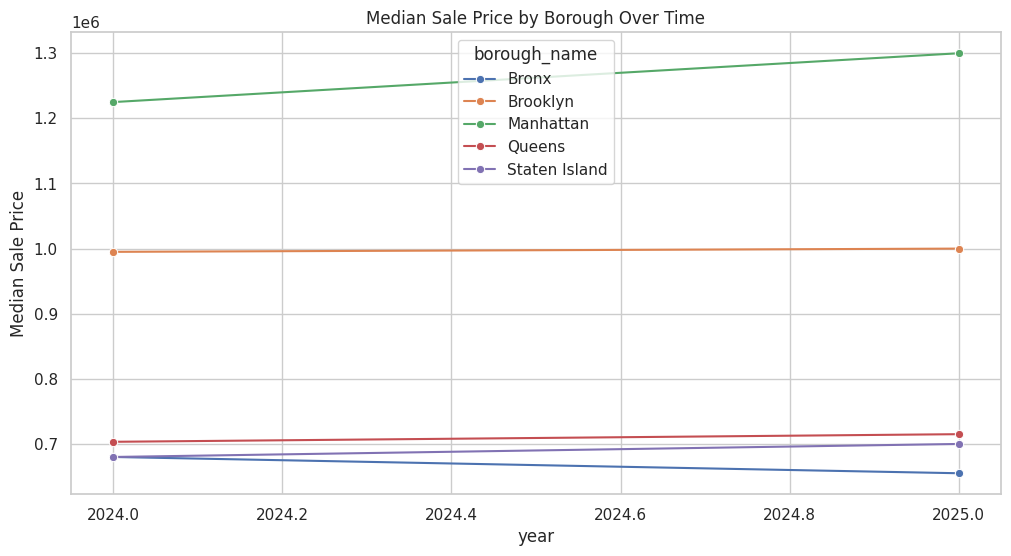

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))

borough_stats = (
    data_all.groupby(["borough_name", "year"])
            .sale_price.median()
            .reset_index()
)

sns.lineplot(
    data=borough_stats,
    x="year",
    y="sale_price",
    hue="borough_name",
    marker="o"
)

plt.title("Median Sale Price by Borough Over Time")
plt.ylabel("Median Sale Price")
plt.show()

In [ ]:
H0(Null Hypothesis): All New York neighborhoods have the same housing price growth rate.

SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-3121620638.py, line 1)

In [ ]:
borough_stats

,borough_name,year,sale_price
0,Bronx,2024,680000.0
1,Bronx,2025,655000.0
2,Brooklyn,2024,995000.0
3,Brooklyn,2025,1000000.0
4,Manhattan,2024,1225000.0
5,Manhattan,2025,1300000.0
6,Queens,2024,703296.5
7,Queens,2025,715000.0
8,Staten Island,2024,680000.0
9,Staten Island,2025,700000.0


In [ ]:
from scipy.stats import chi2_contingency

data_all["price_bin"] = pd.qcut(
    data_all["sale_price"],
    q=3,
    labels=["low", "medium", "high"]
)


table = pd.crosstab(data_all["borough_name"], data_all["price_bin"])
print("Contingency table:")
print(table)

# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(table)

print("\nChi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)

Contingency table:
price_bin       low  medium  high
borough_name                     
Bronx          2015    1491   693
Brooklyn       3556    4288  5882
Manhattan      3319    3711  7769
Queens         6943    6030  2979
Staten Island  1910    2223   419

Chi-square statistic: 6558.568101953512
Degrees of freedom: 8
p-value: 0.0
